## 개요 

- 교차 검증의 필요성과 절차 및 기법에 대해 살펴본다
- 검증 곡선과 학습 곡선의 특징을 이해한다. 
- 최적의 모델을 찾기 위한 그리드 서치 사용법을 익힌다. 
- 특징 공학을 이용한 특징 변환 기법을 알아본다. 

## 교차검증 
### 교차 검증의 기본 절차와 필요성

- 교차검증의 기본 절차: 
    1. 교차 검증 1단계에서는 데이터를 학습용과 테스트용으로 나눔
    2. 모델의 테스트 성능을 기록
    3. 교차 검증의 매 단계마다 다른 파티션으로 위의 작업을 수행
    4. 모델의 최종 성능은 매 단계의 테스트 성능을 평균 계산 


- 교차 검증은 모델의 변동성을 줄여주며 오버피팅과 같은 문제를 막아줌

### 교차 검증 기법 
- k 폴트 교차 검증: 
    1. 데이터를 무작위로 k개의 동일한 크기인 폴드로 나눔. (보통 k값으로 3,5,10을 많이 사용)
    2. 각 시행 단계에서 특정 폴드를 테스트용으로, 나머지는 학습용으로 사용
    3. 각 폴드의 테스트 세트로 한 번씩 사용하고 이 과정을 k번 반복 시행함
    4. 최종적으로 모델 성능의 평균을 계산 

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5) # 5번의 반복 5개의 폴드 
# 반복후 성능에 대한 정보 확인 

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### 단일 관측치 제거 방식(LOOCV)

    1. Leave-one-out cross validation
    2. 매 시행 단계에서 테스트 샘플을 고정하는 방식
    3. 데이터를 n개의 서브세트로 분할하고, n개 중 1개를 테스트용으로 두고 n-1개로 학습을 수행 
    4. 데이터 크기가 n이면 n번의 교차 검증을 수행 

In [8]:
# 검증을 시행할 때마다 한 지점을 제외한 모든 지점에서 훈련 (scikitlearn에서 지원)

In [9]:
from sklearn.model_selection import LeaveOneOut
scores= cross_val_score(model,X,y,cv=LeaveOneOut())
scores 
# 데이터 표가 150개면 교차검증 150회
# 1은 성공, 0은 실패 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
scores.mean()

0.96

## 최적의 모델
### 최적의 모델 선택 방법

    - 모델의 성능이 기대에 못 미칠 경우 어떻게 개선할 것인가? 
        더 복잡하거나 더 유연한 모델을 사용
        덜 복잡하거나 덜 유연한 모델을 사용
        더 많은 훈련 표본을 수집
        각 표본에 특징을 추가하기 위해 더 많은 데이터를 수집 

### 편향 - 분산 트레이드오프 
#### 고편향 모델과 고분산 모델

- 언더피트: 과소적합, 모델이 고편향됨. 모델이 모든 특징을 적절히 설명할 수 있을 만큼의 모델 유연성이 충분치 않음
- 오버피트: 과대적합, 모델이 고분산됨. 모델이 모든 특징을 세밀하게 설명할 수 있을만큼 모델 유연성이 충분하지만, 훈련 데이터의 잡음까지 반영하고 있음 

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # 모델 복잡도를 조절하기 위한 코드 작업 수행 
from sklearn.linear_model import LinearRegression # 선형 모델 
from sklearn.pipeline import make_pipeline # 파이프라인에 등록하면 객체들이 원할(Seemless)하게 수행이 되기 때문에 생산성 높아짐 
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) #np.random.randn(40) = 오차

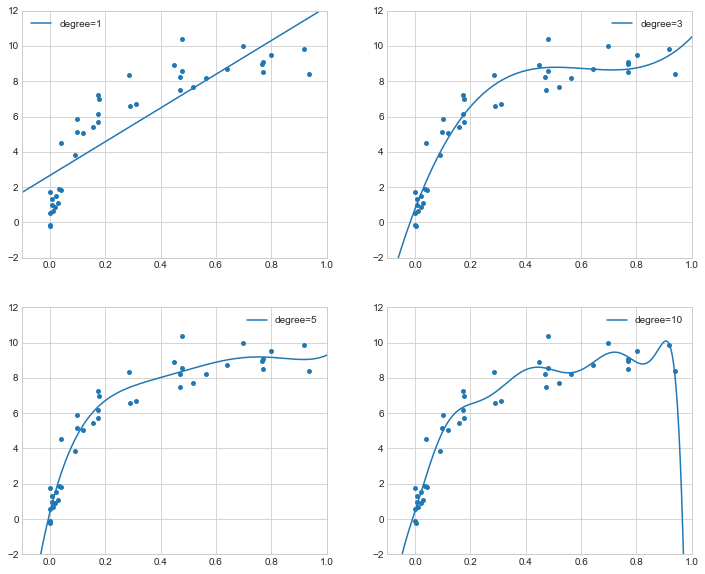

In [5]:
plt.style.use("seaborn-whitegrid")
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1) # --0.1와 1.1 사이의 데이터 500개 생성 

fig = plt.figure(figsize=(12, 10))
for i, degree in enumerate([1,3,5,10], start=1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(),y,s=15)
    y_test=make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(X,y).predict(X_test) # 피처 엔지니어링 작업(차수 조정)
    ax.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree)) # 테스트 예측값으로 라인 그리기
    ax.set_xlim(-0.1,1.0) # limit
    ax.set_ylim(-2,12)
    ax.legend(loc='best')

In [6]:
# degree가 높아짐에 따라 학습 데이터에 최적화되는 것으로 보임 
# 복잡도가 높아지면 노이즈가 발생할 수 있어 성능에 대한 판단이 필요함 

In [7]:
# 언더피트된 모델은 복잡도를 높이고, 오버피트된 모델은 복잡도를 낮춰야함 

##  검증 곡선
- 편향과 분산 사이의 트레이드오프에서 가장 효율적인 지점 -> 최적의 모델 
- 훈련 스코어도 높고 검증 스코어도 높은 지점이 가장 이상적인 지점

(-0.05426898333333127,
 0.9917994754295409,
 -0.7394900547650087,
 10.911541735432142)

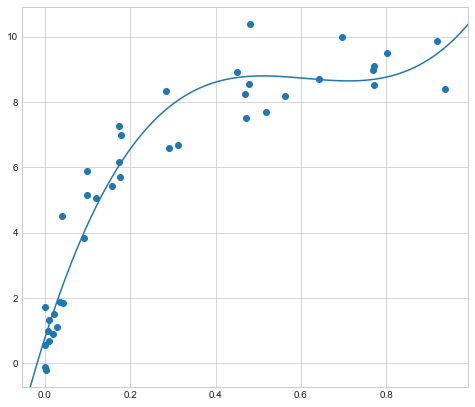

In [9]:
# 최적 모델
plt.figure(figsize=(8,7))
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test=make_pipeline(PolynomialFeatures(3),LinearRegression()).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

## 학습 곡선
- 최적의 모델은 훈련 데이터의 규모에도 의존함 
- 데이터 규모가 증가하니 그래프가 바뀜 
- 학습곡선이 위에 검증곡선이 아래 (정상적인 경우라면)
- 데이터 규모에 따른 변화를 알 수 있는 게 학습 곡선

- 학습곡선: 훈련집합의 크기에 따른 훈련 점수/검증 점수의 플롯

## 그리드 서치(GridSearchCV)
- 검증 점수를 최대화 하는 모델을 찾아내는 자동화 도구

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {"polynomialfeatures__degree": np.arange(21),
          "linearregression__fit_intercept": [True, False],
          "linearregression__normalize": [True, False]}
# 20*2*2 경우의 파라미터 그리드를 만들어 넘기면 자동으로 그리드 서치 진행 
grid = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),param_grid, cv=7) # 7겹의 교차검증

In [24]:
grid.fit(X,y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [25]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

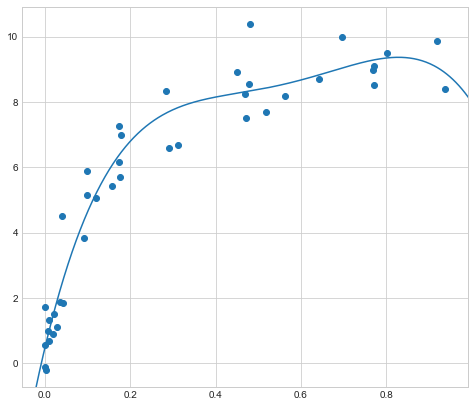

In [26]:
model = grid.best_estimator_ 
model

plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test) # 시각화된 최적 모델 
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

## 실습 1

In [27]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # 다항식과 관련된 특징 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [28]:
np.random.seed(1) 
X = np.random.rand(40, 1) ** 2 # 랜덤 값을 이용해 특징행렬 데이터 만들기 
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

In [29]:
from sklearn.model_selection import validation_curve # 검증 곡선

In [30]:
degree = np.arange(0, 21) # degree 만들기

In [31]:
# 파이프 라인 만들기 (다항식의 복잡성을 증가시키기 위해 PolynomialFeatures 사용)
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2),LinearRegression()), X, y, "polynomialfeatures__degree", degree, cv=7)

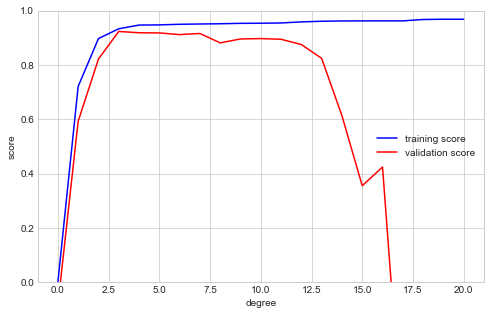

In [32]:
plt.figure(figsize=(8, 5))
# plt 플롯 이용해 라인 플롯 만들기 (시각화)
plt.plot(degree, np.median(train_score, 1), "b-", label="training score")
plt.plot(degree, np.median(val_score, 1), "r-", label="validation score")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best");

In [34]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1) # 특징 행렬 

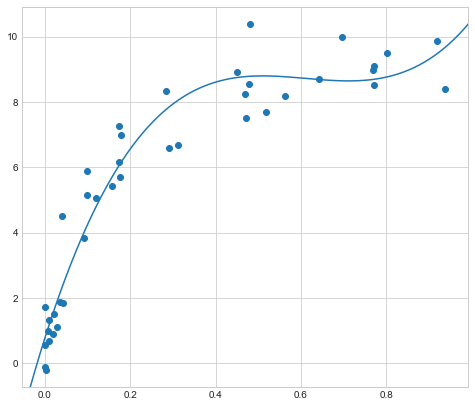

In [33]:
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)

# limit 정보 구성 -> 파이프라인 구성 -> 최종 모델과 데이터 적합 -> 검정
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred) # ravel() = 평평하게 배열
plt.axis(lim);

In [35]:
from sklearn.model_selection import learning_curve # 학습 곡선 만들기

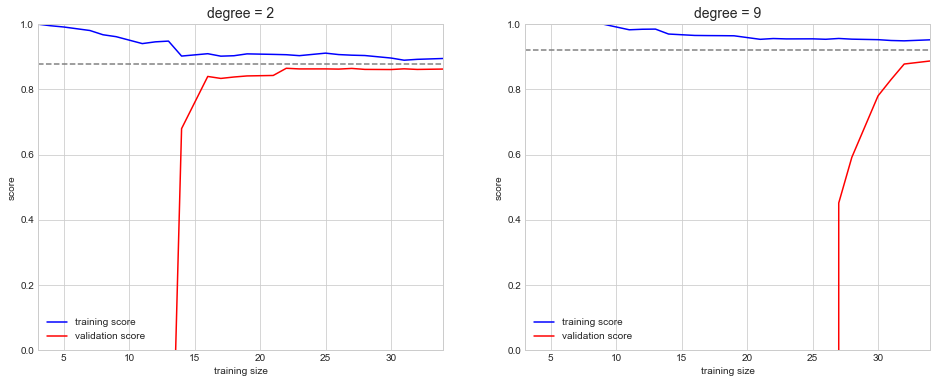

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i, degree in enumerate([2, 9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree=degree),  LinearRegression()),X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label="training score")
    ax[i].plot(n, np.mean(val_lc, 1), "r-", label="validation score")
    # 수렴 지점에 점선 그리기
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color="gray", linestyle="dashed") 
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0, 1), xlabel="training size", ylabel="score")
    ax[i].set_title("degree = {}".format(degree), size=14)
    ax[i].legend(loc="best");

### 그리드 서치

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {"polynomialfeatures__degree": np.arange(21),
          "linearregression__fit_intercept": [True, False],
          "linearregression__normalize": [True, False]}


In [44]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()), params, cv=7)

In [45]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [46]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [42]:
model = grid.best_estimator_
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

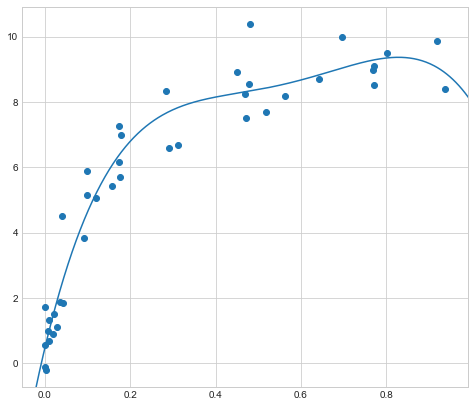

In [43]:
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y) # X를 플랫화 = ravel()
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

## 특징공학

- 특징 공학이란 머신러닝의 특징 행렬을 구축하는데 사용할 수 있는 수치형 데이터로 변환하는 것 
- 범주형 특징을 수치형 특징으로 변환 (인코딩 ex) one-hot-encoding)
- 복잡도를 증가시키기 위한 유도 특징 (예를 들어, x의 차수를 증가시켜 변수를 늘린다거나..) 
- 누락 데이터 대체 

### 범주 특징의 변화

In [48]:
data=[
    {"price": 120000000,"rooms":3,"location":"잠실동"},
    {"price": 70000000,"rooms":4,"location":"천호동"},
    {"price": 130000000,"rooms":4,"location":"신천동"},
    {"price": 450000000,"rooms":2,"location":"천호동"},
]

In [51]:
# DictVectorizer를 이용한 수치형 데이터가 아닌 것을 0,1 수치형 데이터로 변환 
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False, dtype=np.int) # sparse = 희소행렬 
dv.fit_transform(data)

array([[        0,         1,         0, 120000000,         3],
       [        0,         0,         1,  70000000,         4],
       [        1,         0,         0, 130000000,         4],
       [        0,         0,         1, 450000000,         2]])

In [55]:
# sparse = 희소행렬 은 위치 정보 값을 가진 데이터 (매트릭스에 0이 많을 경우) => 메모리를 적게 사용함 

In [53]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'rooms']

In [59]:
dv = DictVectorizer(sparse=False, dtype=np.int)
dv.fit_transform(data)

array([[        0,         1,         0, 120000000,         3],
       [        0,         0,         1,  70000000,         4],
       [        1,         0,         0, 130000000,         4],
       [        0,         0,         1, 450000000,         2]])

### 텍스트 특징의 변환 

In [60]:
text = [
    "a better tomorrow",
    "a few good man",
    "happy day",
    "good morning"
]

In [61]:
from sklearn.feature_extraction.text import CountVectorizer # 특징 행렬로 변환

In [62]:
cvec = CountVectorizer()

In [63]:
X = cvec.fit_transform(text)
X

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [64]:
import pandas as pd

In [65]:
pd.DataFrame(X.toarray(), columns=cvec.get_feature_names())

,better,day,few,good,happy,man,morning,tomorrow
0,1,0,0,0,0,0,0,1
1,0,0,1,1,0,1,0,0
2,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tv = TfidfVectorizer()

In [70]:
X = tv.fit_transform(text)
X

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [71]:
pd.DataFrame(X.toarray(), columns=tv.get_feature_names())
# 문장에서 중요하다고 생각되는 것에 가중치를 부여함 

,better,day,few,good,happy,man,morning,tomorrow
0,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107
1,0.000000,0.000000,0.617614,0.486934,0.000000,0.617614,0.000000,0.000000
2,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.619130,0.000000,0.000000,0.785288,0.000000


### 유도 특징의 추가
원래는 특징이 x밖에 없었는데 X제곱, X세제곱을 추가할 때 이것을 유도 특징이라함

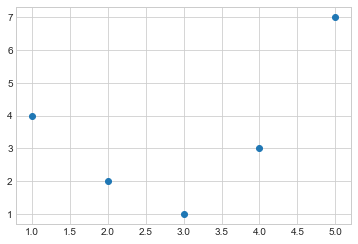

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,6)
y=np.array([4,2,1,3,7])
plt.scatter(x,y);

In [74]:
x

array([1, 2, 3, 4, 5])

In [75]:
y

array([4, 2, 1, 3, 7])

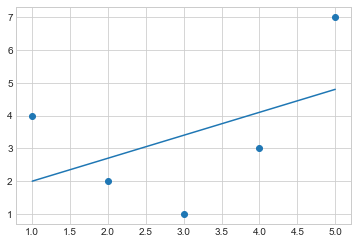

In [76]:
from sklearn.linear_model import LinearRegression
X = x.reshape(-1,1)
model=LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_pred)
# 언더핏, 고편향된 모델이므로 모델을 복잡하게 만들어야 함. 

In [78]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures : 다항식과 관련된 특징을 변환시켜주는 것 
poly = PolynomialFeatures(degree=3, include_bias=False)
# degree=3 : 3차
X2 = poly.fit_transform(X) 
print(X2)
# X의 구조가 5행 1열에서 5행 3열로 바뀜 
# 제곱, 세제곱 

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


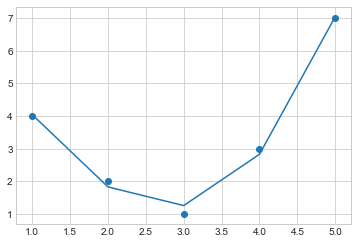

In [80]:
model = LinearRegression()
model.fit(X2,y) # 증가된 모델을 피팅하면 관련 예측값 반환 
y_pred = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,y_pred);

### 누락 데이터 대체

In [81]:
X = np.array([[np.nan, 0, 5],
              [4, 8, 9], 
              [3, 6, 3],
              [5, np.nan, 8],
              [9, 5, 0]])
y = np.array([16, 14, 8, -3, -1])

In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(strategy="mean") # 누락값을 그 열에 해당하는 평균값으로 대체함 
X2 = imputer.fit_transform(X)
X2

array([[5.25, 0.  , 5.  ],
       [4.  , 8.  , 9.  ],
       [3.  , 6.  , 3.  ],
       [5.  , 4.75, 8.  ],
       [9.  , 5.  , 0.  ]])

### 특징 파이프 라인 

1. 누락값을 평균으로 대체
2. 이차 형태의 유도특징 변환
3. 선형회귀 적합 

파이프 라인 : 간단히 말해 묶어주는 것 

In [86]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy="mean"),
                   PolynomialFeatures(degree=2),
                   LinearRegression()) # 유도측징 추가함 (degree=2)

In [87]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [88]:
print(y)

[16 14  8 -3 -1]


In [90]:
print(model.predict(X))

[16. 14.  8. -3. -1.]


## 실습 2

In [110]:
from sklearn.feature_extraction.text import CountVectorizer # one-hot encoding과 관련된 CountVectorizer

In [93]:
text = [
    "a better tomorrow",
    "a few good man",
    "happy day",
    "good morning"
]
# 리스트에 텍스트 정보 구현

In [94]:
cvec = CountVectorizer() # 객체화 

In [95]:
X = cvec.fit_transform(text)
X # 특징행렬 만들기 

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [96]:
import pandas as pd

In [97]:
pd.DataFrame(X.toarray(), columns=cvec.get_feature_names()) # 희소행렬

,better,day,few,good,happy,man,morning,tomorrow
0,1,0,0,0,0,0,0,1
1,0,0,1,1,0,1,0,0
2,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0


In [98]:
import numpy as np

In [99]:
X = np.array([[np.nan, 0, 5],
              [4, 8, 9], 
              [3, 6, 3],
              [5, np.nan, 8],
              [9, 5, 0]])
y = np.array([16, 14, 8, -3, -1])

In [100]:
from sklearn.impute import SimpleImputer # 인코딩된 값 변환하기

In [101]:
imputer = SimpleImputer(strategy="mean")

In [102]:
X2 = imputer.fit_transform(X)
X2

array([[5.25, 0.  , 5.  ],
       [4.  , 8.  , 9.  ],
       [3.  , 6.  , 3.  ],
       [5.  , 4.75, 8.  ],
       [9.  , 5.  , 0.  ]])

In [103]:
from sklearn.pipeline import make_pipeline

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
pl = make_pipeline(SimpleImputer(strategy="mean"),
                   PolynomialFeatures(degree=2),
                   LinearRegression())

In [107]:
pl.fit(X, y) # 파이프 라인을 통해 fit 하기 

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [108]:
print(y)

[16 14  8 -3 -1]


In [109]:
print(pl.predict(X))

[16. 14.  8. -3. -1.]


## 주요 정리

- 교차 검증을 사용하면 모델을 훈련시킬 데이터를 빠뜨릴 수 있는 문제를 방지할 수 있다. 
- 검증곡선을 시각화하면 모델의 복잡도와 관련된 편향과 분산 사이의 트레이드오프에서 적잘한 지점을 확인할 수 있다. 
- 학습곡선 플롯을 이용하면 훈련집합의 크기에 따른 훈련점수와 검증점수의 변화를 시각적으로 확인할 수 있다
- 그리드 서치 자동화 도구를 이용하면 검증 점수를 최대화하는 최적의 모델을 찾아 데이터에 적합시킬 수 있다. 
- 특징 공학을 통해 머신러닝의 특징 행렬을 구축하는데 필요한 범주형 데이터의 인코딩, 복잡도를 증가시키기 위한 유도특징의 추가, 누락 데이터 대체 드으이 작업을 수행하며 파이프라인을 통해 작업의 생산성을 높일 수 있다. 